## Exercise 7

In [628]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from datetime import datetime
import itertools as it

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


yellow
black
maroon


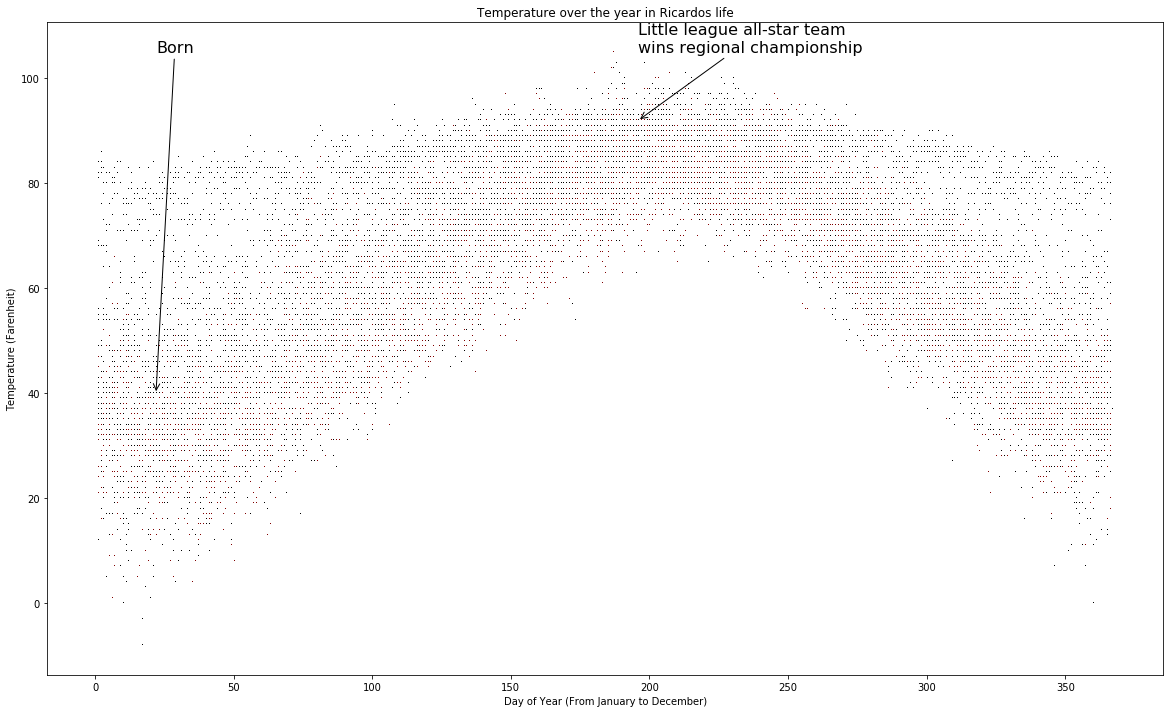

['yellow' 'black' 'maroon']


In [273]:
# First things first - import the data!

chic = pd.read_csv('Data/chic.csv', parse_dates = True, index_col = 1)
pitt = pd.read_csv('Data/pitt.csv', parse_dates = True, index_col = 1)
wash = pd.read_csv('Data/wash.csv', parse_dates = True, index_col = 1)
indi = pd.read_csv('Data/indi.csv', parse_dates = True, index_col = 1)
miam = pd.read_csv('Data/miam.csv', parse_dates = True, index_col = 1)

chic['CITY'] = 'Chic'
pitt['CITY'] = 'Pitt' 
wash['CITY'] = 'Wash'
indi['CITY'] = 'Indi'
miam['CITY'] = 'Miam'

#Create dayofyear var
wholelife = pd.concat([indi, pitt, miam, wash, chic])
wholelife['dayofyear'] = wholelife.index.dayofyear
wholelife['year'] = wholelife.index.year
# Correct for leap year
wholelife['isleap'] = (wholelife['year'] % 4 == 0) & (wholelife['year'] != 2000)
(wholelife['isleap'] == False) & (wholelife['dayofyear'] > 59)
wholelife['dayofyear'][(wholelife['isleap'] == False) & (wholelife['dayofyear'] > 59)] = wholelife['dayofyear'] + 1

#Define locators
wholelife['color'] = 'black'
wholelife.loc[(wholelife.index == '1975/01/22') | (wholelife.index == '1988/07/14'), 'color'] = 'yellow'
wholelife.loc[(wholelife.index >= '2006/06/03') & (wholelife.index <= '2016/10/31'), 'color'] = 'maroon'
life_events = wholelife[wholelife.color == 'yellow']
event_descriptions = ['Born', 'Little league all-star team \nwins regional championship']

fig, ax = plt.subplots(figsize = (20, 12))

#3 overlaying plots
for c in wholelife.color.unique():
    plt.plot(wholelife[wholelife.color==c]['dayofyear'], wholelife[wholelife.color==c]['TMAX'], 'k,', color=c)
    print(c)

for i in range(len(life_events)):
    x = life_events.iloc[i].dayofyear
    y = life_events.iloc[i].TMAX
    y_arrow = wholelife.TMAX.max()
    ax.annotate(event_descriptions[i], (x, y), xytext=(x, y_arrow), size=16,
                arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.title('Temperature over the year in Ricardos life')
plt.ylabel('Temperature (Farenheit)')
plt.xlabel('Day of Year (From January to December)')
plt.show()

print(wholelife.color.unique())

## Exercise 8

     diseased  chol  trig
0           0   195   348
1           0   237   174
2           0   205   158
3           0   201   171
4           0   190    85
5           0   180    82
6           0   193   210
7           0   170    90
8           0   150   167
9           0   200   154
10          0   228   119
11          0   169    86
12          0   178   166
13          0   251   211
14          0   234   143
15          0   222   284
16          0   116    87
17          0   157   134
18          0   194   121
19          0   130    64
20          0   206    99
21          0   158    87
22          0   167   177
23          0   217   114
24          0   234   116
25          0   190   132
26          0   178   157
27          0   265    73
28          0   219    98
29          0   266   486
..        ...   ...   ...
341         1   218    96
342         1   257   402
343         1   259   240
344         1   139    54
345         1   213   261
346         1   178   125
347         

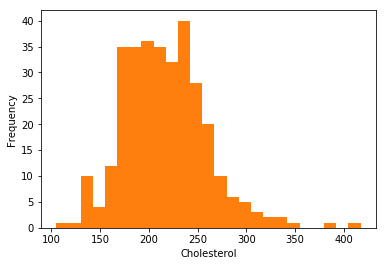

The midpoint of the bin with the highest frequency is 236.04000000000002


<Figure size 432x288 with 0 Axes>

In [344]:
lipid = pd.read_csv('Data/lipids.csv', header=4)
#Limit to only diseased people
lipid = lipid[lipid['diseased']==1]
n, bins = plt.hist(lipid['chol'], bins = 25)[0], plt.hist(lipid['chol'], bins = 25)[1]
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()
plt.savefig('Images\ex82d.jpg')
print("The midpoint of the bin with the highest frequency is", np.array([bins[n.argmax()], bins[n.argmax()+1]]).mean())

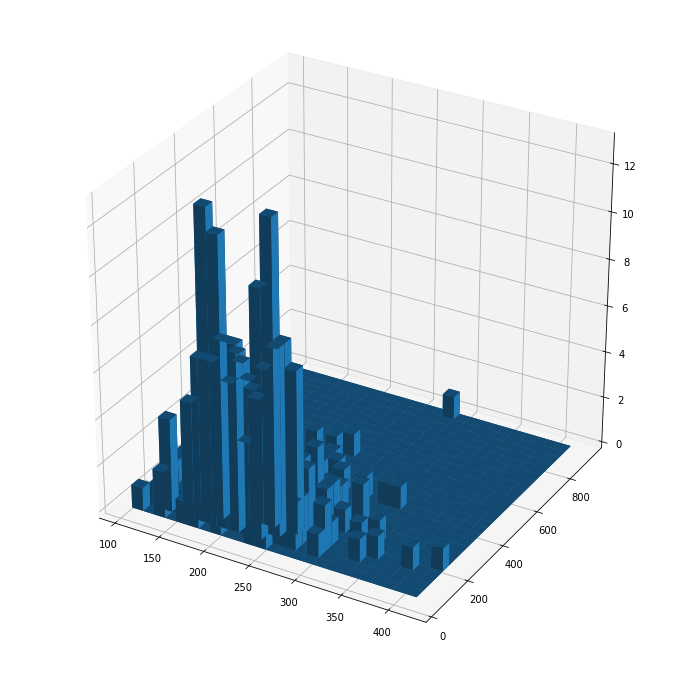

In [345]:
# Construct Mesh Grid for 3D histogram
freq, xedge, yedge = np.histogram2d(lipid['chol'], lipid['trig'], bins = 25)
X, Y = np.meshgrid(xedge[:-1], yedge[:-1])
X = X.flatten('F')
Y = Y.flatten('F')
freq = freq.flatten()


#Plot
fig = plt.figure(figsize =(12, 12))
ax = fig.add_subplot(111, projection='3d')
#See online documentation - the arguments still don't totally make sense to me
ax.bar3d(X, Y, np.zeros_like(freq), xedge[1]-xedge[0], yedge[1] -yedge[0], freq.flatten())
plt.savefig('Images\ex83d.jpg')

I'm actually not sure how to interpret this histogram. It looks mainly like a lot of noise to me, and I don't feel confident enough to say anything about heart disease (especially without a control group! For all I know this is just the same as the whole population distribution...) A heatmap/hexgrid might be better.

## Exercise 9

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

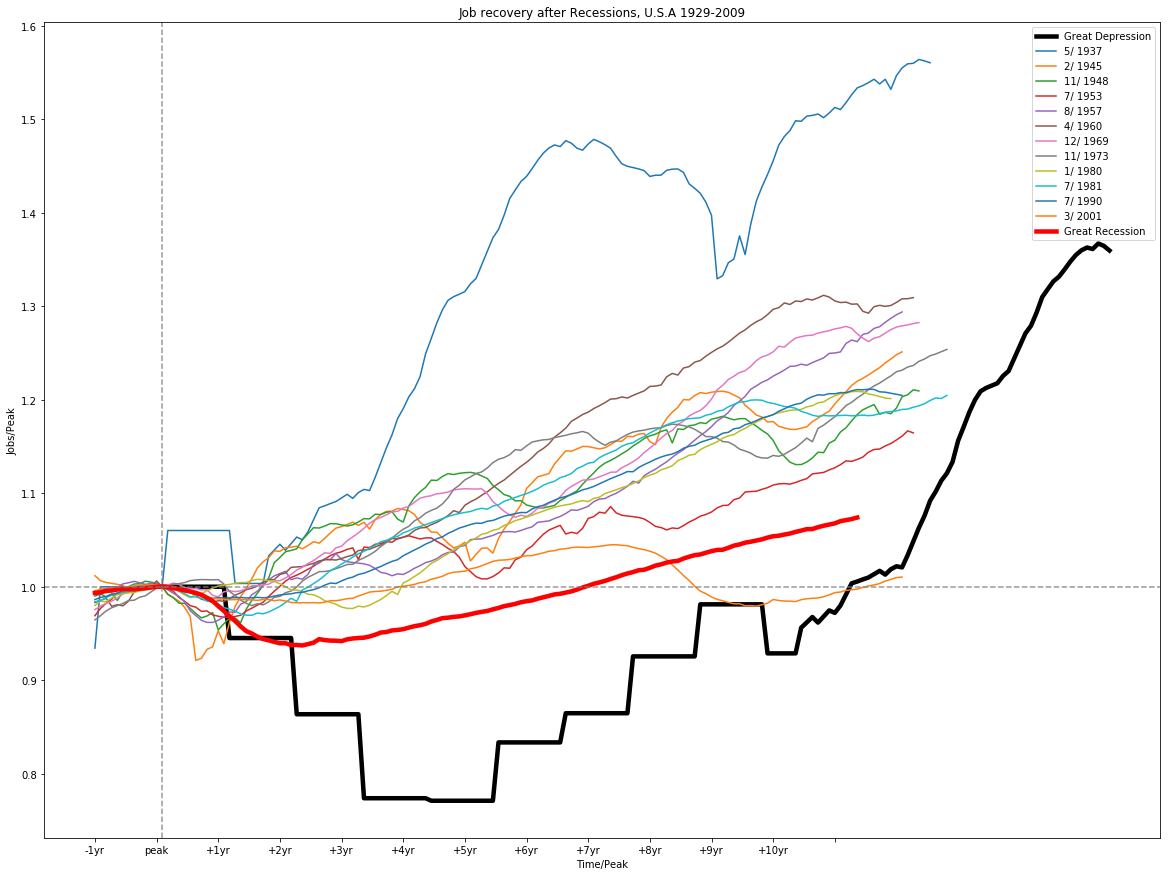

In [645]:
#note that throughout I have the terms 'peak' and trough backwards
jobs = pd.read_csv('Data\payems.csv', parse_dates = True, index_col=0)
'''Note that the first year was coded wrong as 2029 for some reason 
so I went into the csv file and fixed it by hand. '''

# (I): Create 14 time series.
# First, I'll make the time unit consistent by resampling by month
jobs = jobs.resample('M').pad()

#Now, transcribe T=0 for all the recessions.
peaks = ('08/1929', '05/1937', '02/1945', '11/1948', '07/1953', '08/1957', '04/1960', '12/1969', '11/1973', '01/1980', '07/1981', '07/1990', '03/2001', '12/2007')
peaks = pd.to_datetime(peaks, format = '%m/%Y')
troughs = ('03/1933', '06/1938', '10/1945', '10/1949', '05/1954', '04/1958', '02/1961', '11/1970', '03/1975', '07/1980', '11/1982', '03/1991', '11/2001', '06/2009')
troughs = pd.to_datetime(troughs, format = '%m/%Y')

#Okay, so now we've got out T=0. I'll build 14 samples.
#It'll be nice to have a monthcounter column for this.
jobs['Monthcounter'] = np.arange(len(jobs['PAYEMS']))
'''
# I'll also create series with just peaks and troughs and merge them in.
peakdf = pd.DataFrame({'Ispeak': np.ones(len(peaks))}, index=peaks)
peakdf = peakdf.resample('M')
troughdf = pd.DataFrame({'Istrough': np.ones(len(troughs))}, index=troughs)
troughdf = troughdf.resample('M')
print(jobs, peakdf)
#jobs = pd.merge(jobs, peakdf, how='outer')
#print(peakdf.index, jobs.index)
'''
#Define a function which normalizes a timeseries
def normalize(ts, key = 12):
    '''
    Input is a timeseries (from the timeseies() function) (actually a dataframe)
    and a key (t=0)
    Output is the timeseries normalized (divided by the value at the key)
    also put it with a common index!
    '''
    ts['PAYEMS'] = ts['PAYEMS']/(ts['PAYEMS'][key])
    ts['Monthsfrompeak'] = np.arange(0-key, len(ts)-key) 
    ts.index = ts['Monthsfrompeak']
    return ts

#Define a function which takes a time as input and spits out a nice time series
def timeseries(peakdate, troughdate, back = 12, fwd = 126):
    '''
    Input is date, the month in which the recession peaks.
    Also back and forward determine how far back the window goes
    Output should be a time series in the proper form.
    '''
    peakmonth = jobs[(jobs.index.month == peakdate.month) & (jobs.index.year == peakdate.year)]
    troughmonth = jobs[(jobs.index.month == troughdate.month) & (jobs.index.year == troughdate.year)]
    graphlower = peakmonth.Monthcounter[0] - back
    graphupper = troughmonth.Monthcounter[0] + fwd
    series = jobs[(jobs.Monthcounter > graphlower) & (jobs.Monthcounter < graphupper)]
    #Make sure we account for the first data point (there is no past data!)
    if peakmonth.Monthcounter[0] < back:
        series = normalize(series, key = 0)
        #This is not generalizable...
    else:    
        series = normalize(series) 
    return series

#    for
def plot():
    fig = plt.figure(figsize = (20, 15))
    for i in range(len(peaks)):
        ts = timeseries(peaks[i], troughs[i])
        if(peaks[i] == peaks[0]):
            ts['PAYEMS'].plot(c = 'k', lw=4.5, label = "Great Depression")
        elif(peaks[i] == peaks[-1]):
            ts['PAYEMS'].plot(c = 'r', lw=4.5, label = "Great Recession")
        else:
            ts['PAYEMS'].plot(label = f'{peaks[i].month}/{peaks[i].year}')
    plt.legend()    
    plt.axvline(x=0, c='gray', ls='--', alpha=0.8)
    plt.axhline(y=1, c='gray', ls='--', alpha=0.8)
    plt.xticks(np.arange(-12, 125, 11), 
           ['-1yr', 'peak', '+1yr', '+2yr', 
            '+3yr', '+4yr', '+5yr', '+6yr', 
            '+7yr', '+8yr', '+9yr', '+10yr'])
    plt.title("Job recovery after Recessions, U.S.A 1929-2009")  
    plt.ylabel("Jobs/Peak")
    plt.xlabel("Time/Peak")
    plt.show()
    
#x=timeseries(peaks[2], troughs[2])
#y=timeseries(peaks[3], troughs[3])
#x['PAYEMS'].plot()
#y['PAYEMS'].plot()
plot()
#fig = plt.figure(figsize = (20, 15))
#for i in len(peaks):    
#plt.plot(timeseries(peaks[0], troughs[0]))
#plt.plot(timeseries(peaks[2], troughs[2]))
#fig.plot

